# **Detecting Fake News on Social Media Content - LinkedIN, Twitter, Facebook & Instagram**


---


## Introduction

In today's digital age, social media platforms such as LinkedIn, Twitter, Facebook, and Instagram have become primary sources of information dissemination. While these platforms offer significant benefits in terms of connectivity, communication, and information sharing, they also present substantial challenges, particularly with the proliferation of fake news. The rapid spread of misinformation on social media can have serious repercussions, influencing public opinion, inciting panic, and undermining trust in legitimate news sources.

## Problem Statement

Detecting fake news on social media is a critical task that involves identifying and curbing the spread of false information. Given the vast amount of content generated daily on platforms like LinkedIn, Twitter, Facebook, and Instagram, manual detection is impractical. Therefore, leveraging advanced computational techniques such as machine learning and natural language processing (NLP) is essential to develop automated and scalable solutions for fake news detection.

## Solution

Detecting fake news circulating on social media platforms such as Facebook, Twitter, and Instagram is a critical challenge in today's digital landscape. By leveraging advanced machine learning techniques, specifically Logistic Regression, LSTM (Long Short-Term Memory), and BERT (Bidirectional Encoder Representations from Transformers) based models, we aim to develop robust solutions.

**Logistic Regression** serves as an initial baseline model, offering simplicity and interpretability in classifying news articles based on extracted features.

**LSTM models**, known for their ability to capture sequential dependencies in data, are particularly suited for analyzing textual data like social media posts. These models excel in understanding context and detecting patterns in the sequence of words, crucial for identifying nuanced misinformation.

**BERT-based models**, pretrained on large-scale text data, provide a sophisticated approach by leveraging deep bidirectional representations of text. This allows them to grasp intricate semantic relationships and context within social media content, making them highly effective in discerning fake news from legitimate information.

By employing these methodologies, we aim to not only enhance the accuracy and efficiency of fake news detection but also contribute to maintaining the integrity of information shared across these influential platforms. This approach underscores the importance of leveraging cutting-edge technologies to combat misinformation and promote trust in digital media ecosystems.

## Modelling Approach

In this section we will discuss the approach to create models which will be used to detect fake news that are circulating within the social media platforms. We will discuss how to create a model from scratch which includes data preprocessing, feature engineering, model building, hyperparameter tuning/ fine tuning and data visualization for inputs and outputs.

Lets discuss them in brief:

### 1. Data (Text) Preprocessing:

- Lower Case
- Remove links
- Remove next lines (\n)
- Words containing numbers
- Extra spaces
- Special characters
- Removal of stop words
- Stemming
- Lemmatization

### 2. Feature Engineering:

- Convert the Text corpus to a matrix of word counts (Vectorize the Text data)
  - Eg: Use Tf-IDF

### 3. Model Building:

1. Divide the dataset into Train (70%), Test (20%), and Validation (10%) datasets.
2. Building at least 3 classification models:
   - Logistic Regression
   - LSTM Model
   - BERT-Based model
   - **Step 1:** Build model 1 and generate the classification report (Performance metrics using Confusion Matrix) for both Training and Test datasets.
   - **Step 2: (Hyperparameter Tuning / Fine Tuning)**
     - Use grid search or binary search for Hyperparameter Tuning.
     - Use at least 2 values for each hyperparameter.
     - Choose the best model parameters based on grid search and generate the classification report (Performance metrics using Confusion Matrix) for both Training and Test datasets.
   - **Step 3:** Repeat Step 1 and 2 for Model 2 and Model 3 as well.
   - **Step 4:** Now choose the final model based on the classification report (Performance metrics using Confusion Matrix) for both Training, Test, and Validation datasets.

### 4. Data Visualization:

- Explore input data characteristics and model predictions through visualizations to gain insights into the performance and behavior of each model.

#### In the next sections we will be applying and discussing each step of the modelling approach in details.

# **Data** **Preprocessing**


---



Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves transforming raw data into a clean and usable format. The main objectives are to improve the quality of the data and to prepare it for analysis or model training. Some common data preprocessing steps include - Data Cleaning, Data Transformation, Text Data Processing, Handling Imbalanced Data, Dimensionality Reduction, Data Integration, Data Splitting.

**The Data Preprocessing techniques used in this section are -**

- Lower Case
- Remove links
- Remove next lines (\n)
- Words containing numbers
- Extra spaces
- Special characters
- Removal of stop words
- Lemmatization



In [ ]:
# Importing important libraries for data preprocessing
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/FakeNewsNet/FakeNewsNet.csv')

In [ ]:
# Display first 5 rows from the dataset
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [ ]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [ ]:
# Check if any column contains NaN values
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['news_url', 'source_domain']


In [ ]:
# Check the count of null values
print(df.isnull().sum())

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64


In [ ]:
# Fill missing values
df['news_url'].fillna('missing url', inplace=True)
df['source_domain'].fillna('missing domain', inplace=True)

In [ ]:
# Again confirm the count of null values
print(df.isnull().sum())

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64


In [ ]:
# Initialize necessary tools
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

# Customize stop words by excluding certain words while keeping important ones
important_words_to_keep = {"not", "no", "never", "can", "could", "will", "would", "shall", "should", "may", "might", "must",
                           "but", "and", "or", "yet", "so",
                           "I", "you", "he", "she", "it", "we", "they",
                           "a", "an", "the", "this", "that", "these", "those",
                           "in", "on", "at", "by", "for", "with", "of", "to"}

custom_stop_words = stop_words - important_words_to_keep

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    # Lower case
    text = text.lower()

    # Remove links (http, www, https) and ".com"
    text = re.sub(r'http\S+|www\S+|https\S+|\s[A-Za-z]*\.com', '', text, flags=re.MULTILINE)

    # Remove newlines, tabs, and extra spaces
    text = re.sub(r"(\\n|\n|\t|\s\s+)", ' ', text).strip()

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

   # Remove special characters except allowed ones
    allowed_chars = "£$"
    text = re.sub(r"[^a-zA-Z0-9\s" + re.escape(allowed_chars) + "]", '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words and single character tokens
    tokens = [token for token in tokens if token.lower() not in custom_stop_words and len(token) > 1]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]


    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the 'title' column
df['title'] = df['title'].apply(preprocess_text)

In [ ]:
# Handle missing values in title column ()
df['title'].fillna('Missing title', inplace=True)

In [ ]:
# Save the preprocessed dataset
df.to_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv', index=False)

In [ ]:
# Load and display the preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv')
print(df['title'][0])

kandi burruss explodes rape accusation on real housewife of atlanta reunion video


In [ ]:
# Display the preprocessed dataset (First 5 rows)
df.head()

,title,news_url,source_domain,tweet_num,real
0,kandi burruss explodes rape accusation on real...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,people choice award the best red carpet look,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,sophia bush sends sweet birthday message to on...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma spark rumour of inappr...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl year later upper east siders shock...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1



# **Exploratory Data Analysis (EDA)**
---


Exploratory Data Analysis (EDA) involves using data visualization techniques to understand the distribution, patterns, and relationships within a dataset.

**Some of the used EDA techniques used in this section are:**
- Count plot
- Pie Chart
- Bar Plot
- Word Cloud
- Histogram
- Distribution Plots (KDE Plot)

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv')

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23192 non-null  object
 1   news_url       23196 non-null  object
 2   source_domain  23196 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB
None


In [ ]:
# Overview
print(df.describe())

          tweet_num          real
count  23196.000000  23196.000000
mean      88.956803      0.751897
std      488.694592      0.431921
min        0.000000      0.000000
25%       11.000000      1.000000
50%       37.000000      1.000000
75%       65.000000      1.000000
max    29060.000000      1.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64


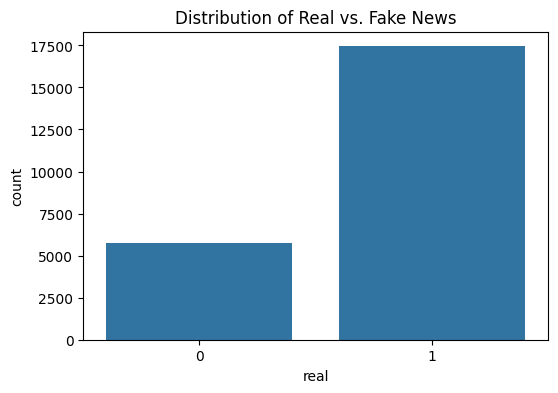

In [ ]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='real', data=df)
plt.title('Distribution of Real vs. Fake News')
plt.show()

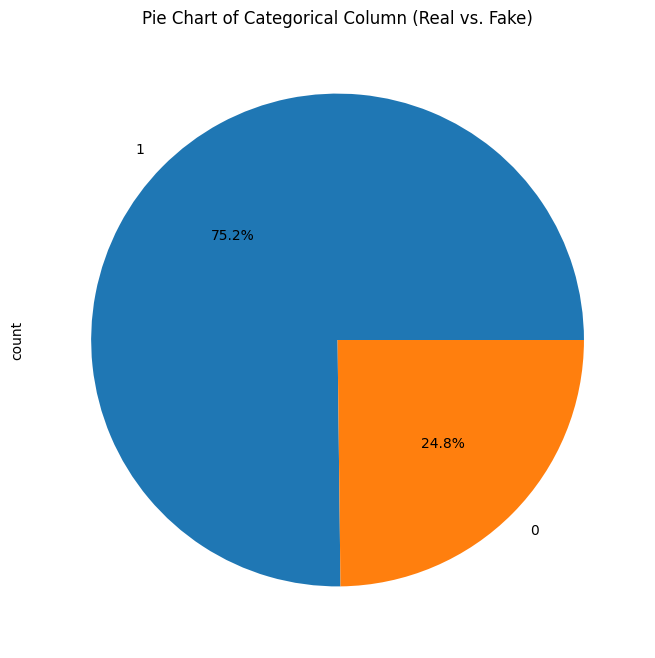

In [ ]:
# Pie Chart of target variable
plt.figure(figsize=(8, 8))
df['real'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Column (Real vs. Fake)')
plt.show()

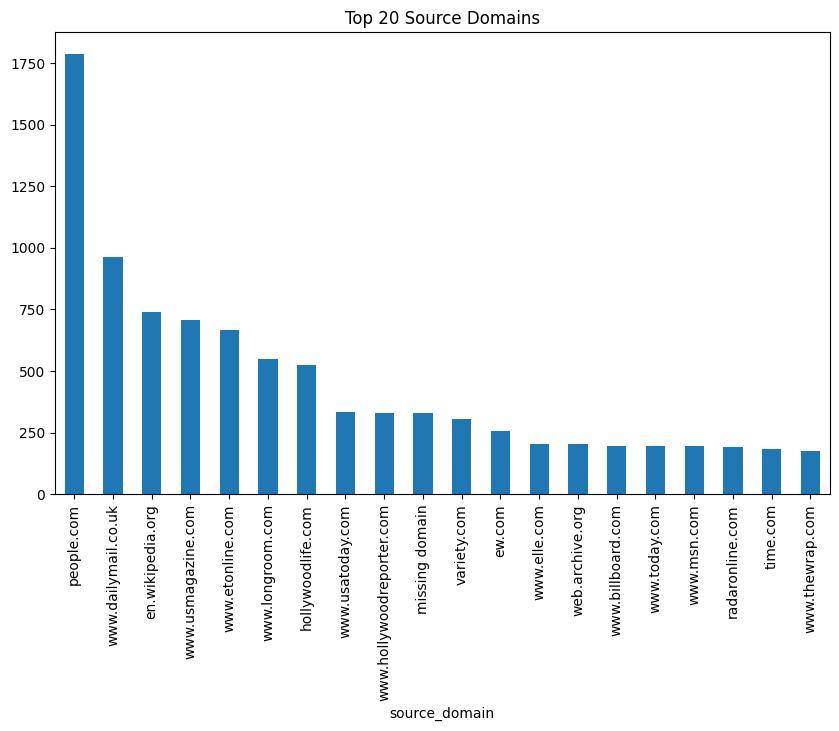

In [ ]:
# Distribution of Source Domains
plt.figure(figsize=(10, 6))
df['source_domain'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Source Domains')
plt.xticks(rotation=90)
plt.show()

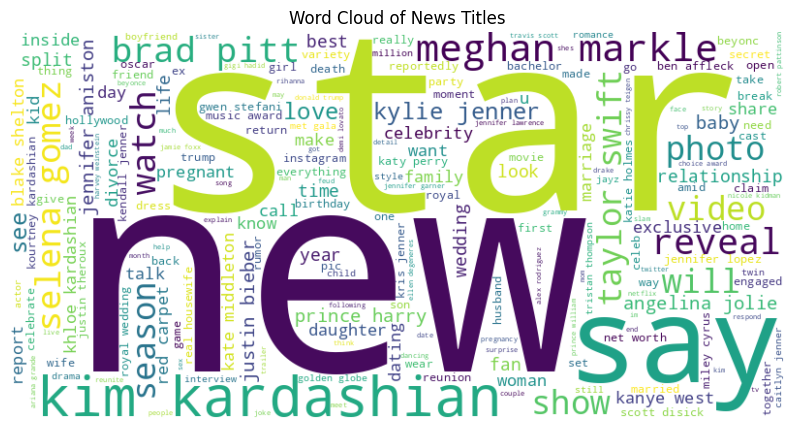

In [ ]:
# Word Cloud for Titles
text = ' '.join(df['title'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Titles')
plt.show()

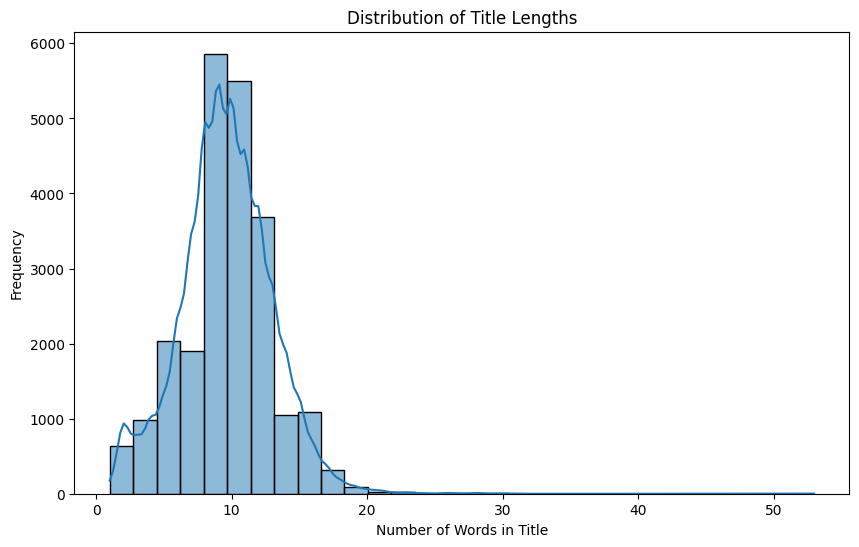

In [ ]:
# Distribution of Title Lengths
title_lengths = df['title'].str.split().apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(title_lengths, bins=30, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Number of Words in Title')
plt.ylabel('Frequency')
plt.show()

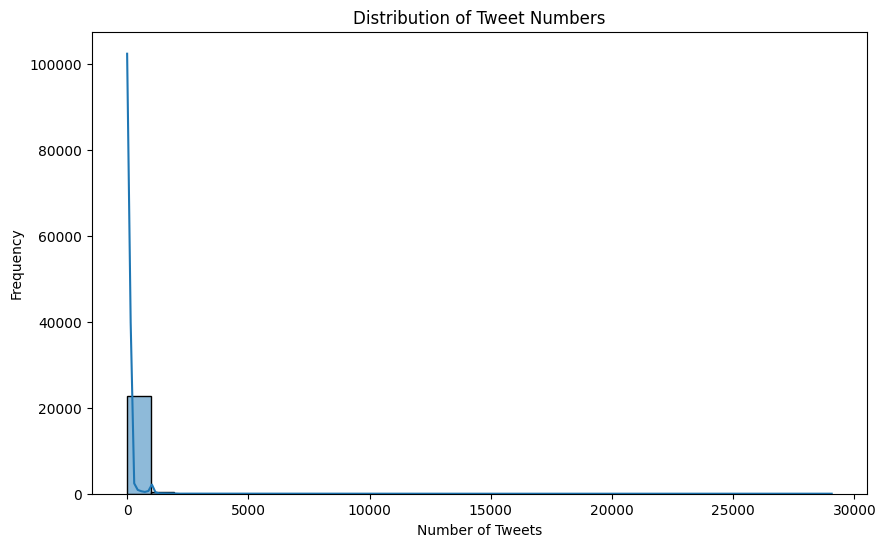

In [ ]:
# Distribution of Tweet Numbers
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_num'], bins=30, kde=True)
plt.title('Distribution of Tweet Numbers')
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')
plt.show()

# **Logistic** **Regression** **Model**


---

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is a binary variable (0 or 1, true or false, yes or no).



### **Steps to Build a Logistic Regression Model for Fake News Detection:**  

**Step 1.** Import Libraries:
- Import: numpy, pandas, sklearn, matplotlib, seaborn, imblearn.

**Step 2.** Load and Preprocess Data:
- Load "FakeNewsNet.csv" dataset and preprocess data (if required).

**Step 3.** Feature Selection and Splitting:
- Divide the dataset into Train (70%), Test (20%), and Validation (10%) datasets.

**Step 4.** Train the Model:
- Create an instance of the logistic regression model and fit the model on the training data.

**Step 5.** Evaluate the Model:
- Make predictions on the test set. Evaluate the model using metrics like accuracy, confusion matrix, and classification report.

**Step 6.** Train and Evaluate the Model with Grid Search for Hyperparameter Tuning:
- Setup parameter grid, instantiate Logistic Regression Model, perform Grid Search cross-validation and evaluate the model.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv')

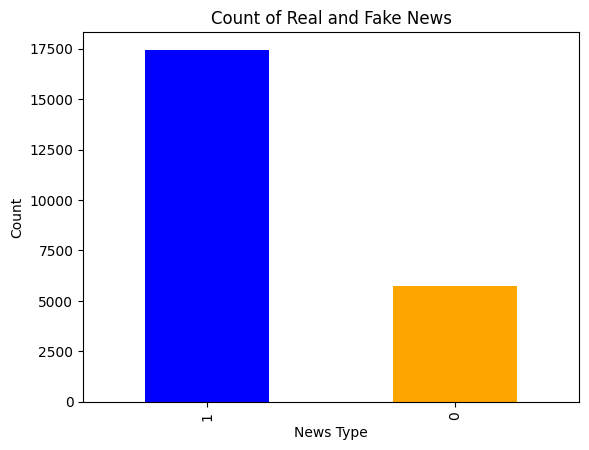

Fake News Count (0): 5755
Real News Count (1): 17441


In [ ]:
# Show the count of real and fake news
df['real'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Count of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# Print count of real and fake news
# Get the count of 0s and 1s in the 'real' column
count_values = df['real'].value_counts()

# Print the counts with labels
fake_count = count_values[0]  # Count of fake news
real_count = count_values[1]  # Count of real news

print(f"Fake News Count (0): {fake_count}")
print(f"Real News Count (1): {real_count}")

In [ ]:
# Handle any missing values in title column (if any)
df['title'].fillna("Unknown Title", inplace=True)

In [ ]:
# Combine text features into one column
X = df['title'] + ' ' + df['news_url'] + ' ' + df['source_domain']
y = df['real']

In [ ]:
# Split data into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# Further split temp into test (20%) and validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=101)

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_vec_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

In [ ]:
# Define a basic logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled training data
model.fit(X_train_vec_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
train_score = model.score(X_train_vec_smote, y_train_smote)
val_score = model.score(X_val_vec, y_val)
test_score = model.score(X_test_vec, y_test)

print("Train Score:", train_score)
print("Validation Score:", val_score)
print("Test Score:", test_score)

Train Score: 0.9815953434989343
Validation Score: 0.959879206212252
Test Score: 0.9575522516698988


In [ ]:
print(f"Number of iterations to converge: {model.n_iter_}")

Number of iterations to converge: [75]


Validation Accuracy (LR Model): 0.959879206212252
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       590
           1       0.97      0.98      0.97      1728

    accuracy                           0.96      2318
   macro avg       0.95      0.94      0.95      2318
weighted avg       0.96      0.96      0.96      2318



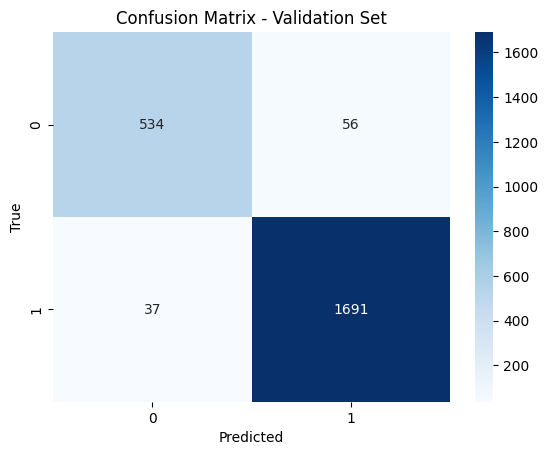

In [ ]:
# Validate the logistic regression model
val_predictions = model.predict(X_val_vec)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy (LR Model):", val_accuracy)
print(classification_report(y_val, val_predictions))

# Confusion matrix for validation set
val_cm = confusion_matrix(y_val, val_predictions)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test Accuracy (LR Model): 0.9575522516698988
Test ROC-AUC Score (LR Model): 0.9872634156078111
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1126
           1       0.97      0.97      0.97      3515

    accuracy                           0.96      4641
   macro avg       0.94      0.94      0.94      4641
weighted avg       0.96      0.96      0.96      4641



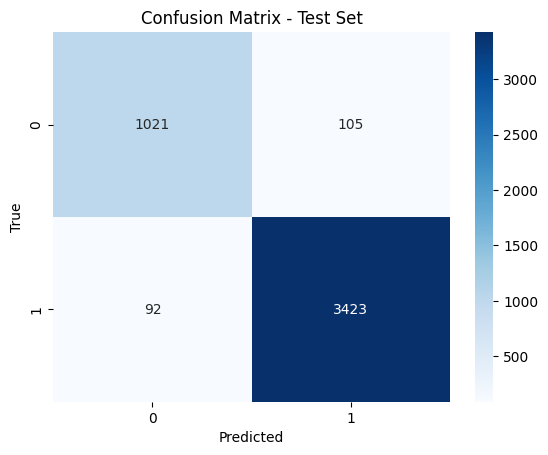

In [ ]:
# Test the logistic regression model
test_predictions = model.predict(X_test_vec)
test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_vec)[:, 1])
print("Test Accuracy (LR Model):", test_accuracy)
print("Test ROC-AUC Score (LR Model):", test_roc_auc)
print(classification_report(y_test, test_predictions))

# Confusion matrix for test set
val_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Hyperparameter tuning on Logistic Regression Model

In [ ]:
# Define the parameters for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg']  # Optimization algorithms
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=100000, random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)  # Use all available CPU cores

In [ ]:
# Perform grid search on the training data
grid_search.fit(X_train_vec_smote, y_train_smote)  # Use resampled training data for grid search

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10.0, 'solver': 'liblinear'}


Validation Accuracy (Tuned LR Model): 0.9810181190681622
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       590
           1       0.98      0.99      0.99      1728

    accuracy                           0.98      2318
   macro avg       0.98      0.97      0.97      2318
weighted avg       0.98      0.98      0.98      2318



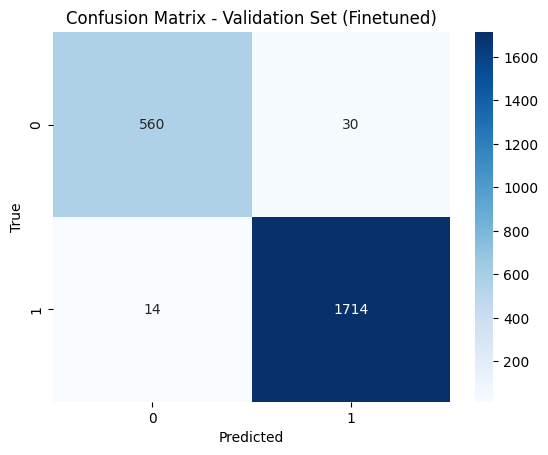

In [ ]:
# Evaluate the model with best parameters on the validation set
best_model = grid_search.best_estimator_
val_predictions_tuned = best_model.predict(X_val_vec)
val_accuracy_tuned = accuracy_score(y_val, val_predictions_tuned)
print("Validation Accuracy (Tuned LR Model):", val_accuracy_tuned)
print(classification_report(y_val, val_predictions_tuned))

# Confusion matrix for validation set (Best Parameters)
val_cm = confusion_matrix(y_val, val_predictions_tuned)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set (Finetuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test Accuracy (Tuned LR Model): 0.9816849816849816
Test ROC-AUC Score (Tuned LR Model): 0.9944101528844914
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1126
           1       0.99      0.99      0.99      3515

    accuracy                           0.98      4641
   macro avg       0.98      0.97      0.97      4641
weighted avg       0.98      0.98      0.98      4641



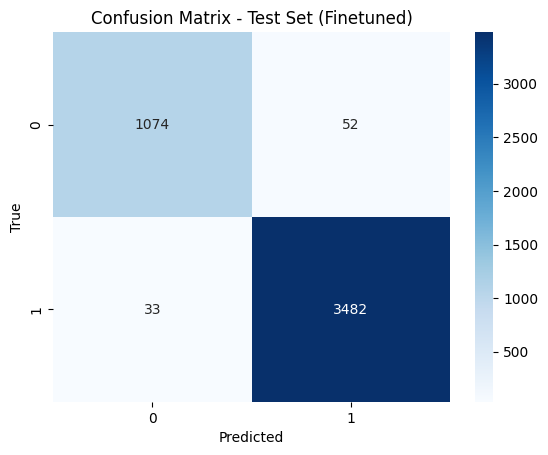

In [ ]:
# Evaluate the model with best parameters on the test set
test_predictions_tuned = best_model.predict(X_test_vec)
test_accuracy_tuned = accuracy_score(y_test, test_predictions_tuned)
test_roc_auc_tuned = roc_auc_score(y_test, best_model.predict_proba(X_test_vec)[:, 1])
print("Test Accuracy (Tuned LR Model):", test_accuracy_tuned)
print("Test ROC-AUC Score (Tuned LR Model):", test_roc_auc_tuned)
print(classification_report(y_test, test_predictions_tuned))

# Confusion matrix for test set (Best Parameters)
val_cm = confusion_matrix(y_test, test_predictions_tuned)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (Finetuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Predict custom input
custom_input = "gwen stefani got dumped by blake shelton jealousy and drama exclusive"
vectorized_input = vectorizer.transform([custom_input])
prediction = best_model.predict(vectorized_input)

# Print prediction result
print("Prediction for custom input:", "Real" if prediction[0] == 1 else "Fake")

Prediction for custom input: Fake


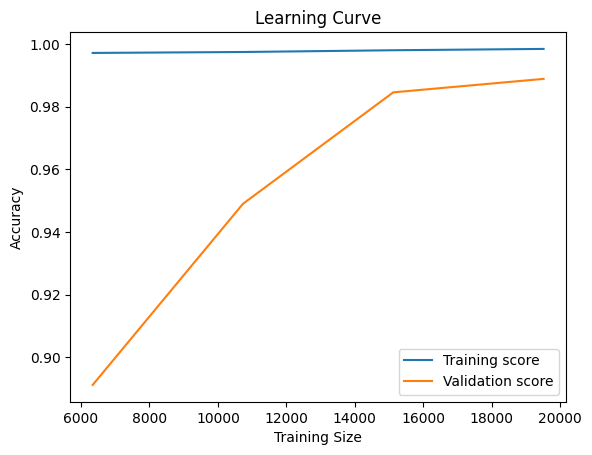

In [ ]:
# Plot training vs validation score
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_vec_smote, y_train_smote, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### **Figure: Training Vs Validation Score**

1. Stable Training Score:
- The blue line representing the training score remains consistently high across different training sizes.
- This indicates that the model performs well on the training data, even as more examples are added.
- A stable training score suggests that the model has learned effectively from the available data.
2. Improving Validation Score:
- The orange line representing the validation score starts lower but increases significantly as more data points are included.
- This improvement suggests that the model generalizes better to unseen data when trained on a larger dataset.
- The validation score’s upward trend indicates that the model benefits from additional examples.

# **BERT-based** **Model** **(DistilBERT Model)**


---
DistilBERT is a smaller, faster, and lighter version of BERT (Bidirectional Encoder Representations from Transformers). It retains 97% of BERT's language understanding while being 60% faster and 40% smaller. DistilBERT is trained using a technique called knowledge distillation, where a smaller network (the student) is trained to reproduce the behavior of a larger network (the teacher, in this case, BERT).


### **Steps to Build and Use a DistilBERT Model for Fake News Detection:**

**Step 1.** Install Necessary Libraries:

- Install transformers library for DistilBERT model and import torch for PyTorch.

**Step 2.** Load Pre-trained Model and Tokenizer:

- Load a pre-trained DistilBERT model and tokenizer from Hugging Face's transformers library.

**Step 3.** Tokenize Input Data:

- Convert input text data into the format required by DistilBERT.

**Step 4.** Create Data Loaders:

- Use PyTorch DataLoader for batching and shuffling the data.

**Step 5.** Fine-tune the Model:

- Fine-tune the pre-trained model on your specific dataset.

**Step 6.** Evaluate the Model:

- Use appropriate metrics to evaluate the model's performance.


In [ ]:
# Install transformers library if not already installed
!pip install transformers
# Import required libraries
import torch
from transformers import DistilBertTokenizer, DistilBertModel, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

In [ ]:
# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Tokenize text data
def tokenize_text(texts, max_length):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,                      # Text to encode
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_length,   # Pad & truncate all sentences
                            pad_to_max_length = True,
                            return_attention_mask = True,  # Construct attn. masks
                            return_tensors = 'pt'      # Return pytorch tensors
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Set maximum sequence length
max_length = 128

In [ ]:
# Tokenize and encode training, validation, and test data
X_train_input_ids, X_train_attention_masks = tokenize_text(X_train, max_length)
X_val_input_ids, X_val_attention_masks = tokenize_text(X_val, max_length)
X_test_input_ids, X_test_attention_masks = tokenize_text(X_test, max_length)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Load pre-trained DistilBERT model
model_bert = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',  # Use pre-trained model
    num_labels = 2,             # Binary classification (fake vs real news)
    output_attentions = False,  # Do not return attentions weights
    output_hidden_states = False  # Do not return all hidden-states
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define optimizer and learning rate scheduler
optimizer = AdamW(model_bert.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(X_train_input_ids) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,  # Default value
    num_training_steps = total_steps
)

# Prepare DataLoader for training
batch_size = 32

train_data = TensorDataset(X_train_input_ids, X_train_attention_masks, torch.tensor(y_train.values))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_bert.to(device)

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    print('-' * 10)

    model_bert.train()

    total_loss = 0

    for batch in train_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model_bert.zero_grad()

        outputs = model_bert(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_masks,
            labels=batch_labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model_bert.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Average Training Loss: {avg_train_loss}')


Epoch 1/3
----------
Average Training Loss: 0.077029904470262
Epoch 2/3
----------
Average Training Loss: 0.02695293343173593
Epoch 3/3
----------
Average Training Loss: 0.0120317407271091


In [ ]:
# Evaluation on validation set
model_bert.eval()

val_data = TensorDataset(X_val_input_ids, X_val_attention_masks, torch.tensor(y_val.values))
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

predictions, true_labels = [], []

for batch in val_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2]

    with torch.no_grad():
        outputs = model_bert(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_masks
        )

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()

    predictions.extend(np.argmax(logits, axis=1))
    true_labels.extend(batch_labels.numpy())

In [ ]:
# Calculate accuracy and other metrics
val_accuracy_bert = accuracy_score(true_labels, predictions)
print(f"Validation Accuracy (BERT Model): {val_accuracy_bert}")
print(classification_report(true_labels, predictions))

Validation Accuracy (BERT Model): 0.9905090595340811
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       590
           1       0.99      1.00      0.99      1728

    accuracy                           0.99      2318
   macro avg       0.99      0.98      0.99      2318
weighted avg       0.99      0.99      0.99      2318



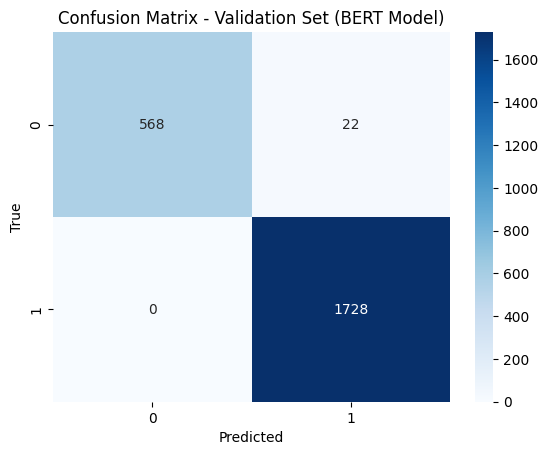

In [ ]:
# Confusion matrix for validation set (BERT Model)
val_cm_bert = confusion_matrix(true_labels, predictions)
sns.heatmap(val_cm_bert, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set (BERT Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluation on test set
test_data = TensorDataset(X_test_input_ids, X_test_attention_masks, torch.tensor(y_test.values))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

predictions_test, true_labels_test = [], []

for batch in test_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2]

    with torch.no_grad():
        outputs = model_bert(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_masks
        )

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()

    predictions_test.extend(np.argmax(logits, axis=1))
    true_labels_test.extend(batch_labels.numpy())

In [ ]:
# Calculate accuracy and other metrics
test_accuracy_bert = accuracy_score(true_labels_test, predictions_test)
print(f"Test Accuracy (BERT Model): {test_accuracy_bert}")
print(classification_report(true_labels_test, predictions_test))

Test Accuracy (BERT Model): 0.9939668174962293
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1126
           1       0.99      1.00      1.00      3515

    accuracy                           0.99      4641
   macro avg       1.00      0.99      0.99      4641
weighted avg       0.99      0.99      0.99      4641



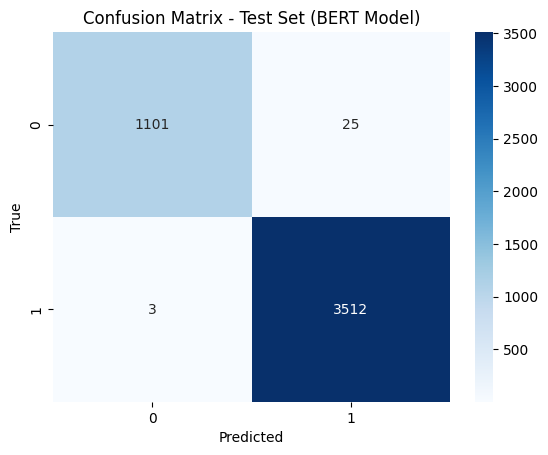

In [ ]:
# Confusion matrix for test set (BERT Model)
test_cm_bert = confusion_matrix(true_labels_test, predictions_test)
sns.heatmap(test_cm_bert, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (BERT Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import torch

def predict_custom_input(text):
    """
    Predicts sentiment for a given custom text input.

    Args:
        text: The custom text input string.

    Returns:
        A string indicating predicted sentiment ("Real" or "Fake").
    """
    # Tokenize the custom input
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',  # Use padding argument instead of deprecated pad_to_max_length
        return_attention_mask=True,
        return_tensors='pt'
    )
    custom_input_ids = encoded_dict['input_ids'].to(device)  # Move to device
    custom_attention_mask = encoded_dict['attention_mask'].to(device)

    # Predict with DistilBERT model
    with torch.no_grad():
        outputs = model_bert(custom_input_ids, custom_attention_mask)
    logits = outputs.logits

    # Get the most likely class (Real or Fake)
    prediction = torch.argmax(logits, dim=1).item()  # Get the index of max value
    predicted_class = "Real" if prediction == 1 else "Fake"  # Assuming label 1 is "Real"

    return predicted_class

# Example usage
custom_input = "gwen stefani got dumped by blake shelton jealousy and drama exclusive"
prediction = predict_custom_input(custom_input)
print("Prediction for custom input:", prediction)


Prediction for custom input: Fake


# **Bidirectional LSTM (BiLSTM)**

---
A Bidirectional LSTM is an extension of the traditional LSTM architecture that enhances its ability to capture patterns from sequential data by processing it in both forward and backward directions.


### **Steps to Build a Bidirectional LSTM (BiLSTM) Model for Fake News Detection:**

**Step 1:** Import Libraries:

- Import required libraries for building the BiLSTM model.

**Step 2:** Tokenize Text Data:

- Tokenize text data, convert texts to sequences and pad sequences to ensure uniform length.

**Step 3.** Split Data into Train and Test Sets:

- Split the dataset into training, validation and testing sets.

**Step 4.** Define BiLSTM Model Architecture:

- Define LSTM model architecture with bidirectional layer and dropout

**Step 5.** Compile the Model:

- Compile the BiLSTM model with appropriate optimizer and loss function.

**Step 6.** Train the Model:

- Train the BiLSTM model on the training data.

**Step 7.** Evaluate the Model:

- Evaluate the trained BiLSTM model on the test data.

In [ ]:
# Import important libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Tokenize text data
tokenizer_lstm = Tokenizer()
tokenizer_lstm.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer_lstm.texts_to_sequences(X_train)
X_val_seq = tokenizer_lstm.texts_to_sequences(X_val)
X_test_seq = tokenizer_lstm.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_seq_length = 128  # Max sequence length to pad

X_train_seq_padded = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_val_seq_padded = pad_sequences(X_val_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [ ]:
# Define LSTM model architecture with bidirectional layer and dropout
lstm_model = Sequential()
lstm_model.add(Embedding(len(tokenizer_lstm.word_index) + 1, 128, input_length=max_seq_length))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 128)          3618048   
                                                                 
 spatial_dropout1d (Spatial  (None, 128, 128)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 3881473 (14.81 MB)
Trainable params: 3881473 (14.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Train the LSTM model
epochs_lstm = 5
batch_size_lstm = 32

history_lstm = lstm_model.fit(X_train_seq_padded, y_train, epochs=epochs_lstm, batch_size=batch_size_lstm,
                              validation_data=(X_val_seq_padded, y_val), verbose=1)

Epoch 1/5
508/508 [==============================] - 441s 849ms/step - loss: 0.1476 - accuracy: 0.9475 - val_loss: 0.0608 - val_accuracy: 0.9823
Epoch 2/5
508/508 [==============================] - 419s 825ms/step - loss: 0.0339 - accuracy: 0.9900 - val_loss: 0.0635 - val_accuracy: 0.9840
Epoch 3/5
508/508 [==============================] - 436s 859ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0565 - val_accuracy: 0.9840
Epoch 4/5
508/508 [==============================] - 492s 970ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.1057 - val_accuracy: 0.9840
Epoch 5/5
508/508 [==============================] - 417s 821ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0961 - val_accuracy: 0.9814


In [ ]:
# Evaluate on validation set
val_loss_lstm, val_accuracy_lstm = lstm_model.evaluate(X_val_seq_padded, y_val, verbose=0)
print(f"Validation Accuracy (LSTM Model): {val_accuracy_lstm}")

Validation Accuracy (LSTM Model): 0.981449544429779


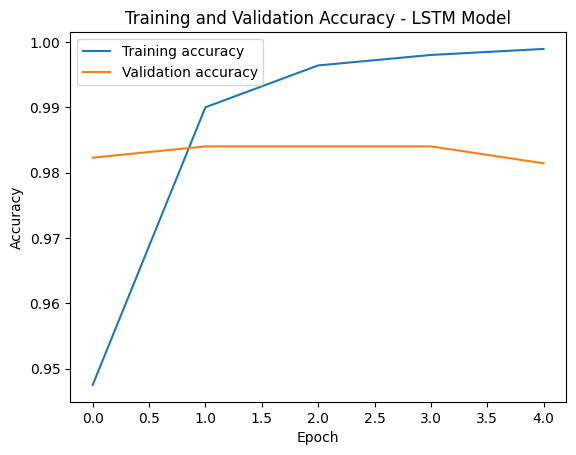

In [ ]:
# Plot training history
plt.plot(history_lstm.history['accuracy'], label='Training accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy - LSTM Model')
plt.legend()
plt.show()

In [ ]:
# Make predictions on validation set
predictions_val_lstm_prob = lstm_model.predict(X_val_seq_padded)
predictions_val_lstm = (predictions_val_lstm_prob > 0.5).astype('int32')  # Threshold of 0.5 for binary classification

# Convert to 1D array
predictions_val_lstm = predictions_val_lstm.flatten()

# Print classification report for validation set
print("Classification Report for Validation Set (LSTM Model):")
print(classification_report(y_val, predictions_val_lstm))

73/73 [==============================] - 6s 83ms/step
Classification Report for Validation Set (LSTM Model):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       590
           1       0.98      0.99      0.99      1728

    accuracy                           0.98      2318
   macro avg       0.98      0.97      0.98      2318
weighted avg       0.98      0.98      0.98      2318



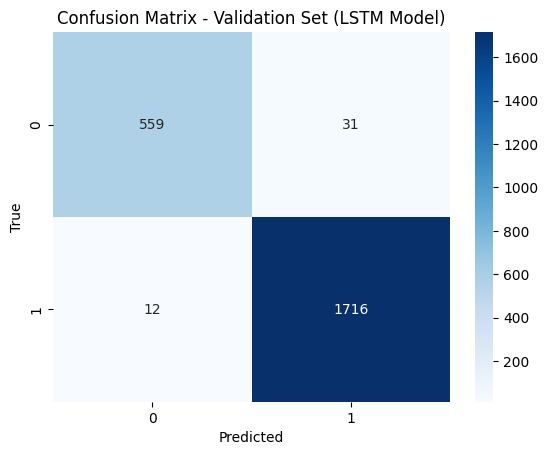

In [ ]:
# Confusion matrix for validation set (LSTM Model)
val_cm_lstm = confusion_matrix(y_val, predictions_val_lstm)
sns.heatmap(val_cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set (LSTM Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluate on test set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_test_seq_padded, y_test, verbose=0)
print(f"Test Accuracy (LSTM Model): {test_accuracy_lstm}")

Test Accuracy (LSTM Model): 0.9859943985939026


In [ ]:
# Make predictions on test set
predictions_lstm_prob = lstm_model.predict(X_test_seq_padded)
predictions_lstm = (predictions_lstm_prob > 0.5).astype('int32')  # Threshold of 0.5 for binary classification

# Convert to 1D array
predictions_lstm = predictions_lstm.flatten()

# Print classification report
print("Classification Report for Test Set (LSTM Model):")
print(classification_report(y_test, predictions_lstm))

146/146 [==============================] - 11s 77ms/step
Classification Report for Test Set (LSTM Model):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1126
           1       0.99      0.99      0.99      3515

    accuracy                           0.99      4641
   macro avg       0.98      0.98      0.98      4641
weighted avg       0.99      0.99      0.99      4641



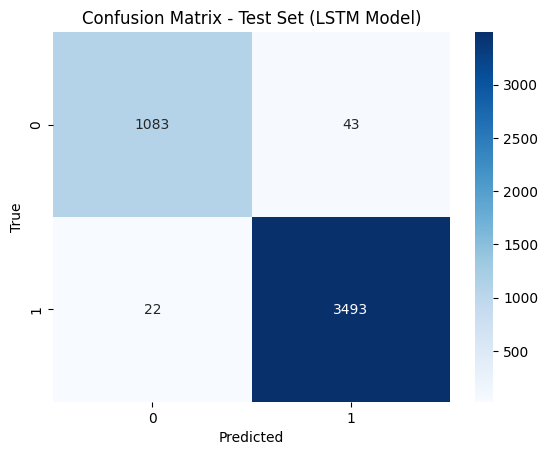

In [ ]:
# Confusion matrix for test set (LSTM Model)
test_cm_lstm = confusion_matrix(y_test, predictions_lstm)
sns.heatmap(test_cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (LSTM Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Define a function to predict sentiment for a given text
def predict_custom_input_lstm(text):
  """
  Predicts sentiment for a custom text input.

  Args:
      text: The custom text input string.

  Returns:
      A list containing the predicted sentiment probability (between 0 and 1)
          and the predicted class ("positive" or "negative").
  """
  # Convert the text to a sequence
  custom_seq = tokenizer_lstm.texts_to_sequences([text])

  # Pad the sequence
  custom_seq_padded = pad_sequences(custom_seq, maxlen=max_seq_length, padding='post', truncating='post')

  # Predict with the LSTM model
  prediction_prob = lstm_model.predict(custom_seq_padded)[0][0]  # Probability for the first element (custom input)
  predicted_class = "Real" if prediction_prob > 0.5 else "Fake"

  return [prediction_prob, predicted_class]

# Example usage
custom_input = "gwen stefani got dumped by blake shelton jealousy and drama exclusive"
prediction_prob, predicted_class = predict_custom_input_lstm(custom_input)

print(f"Prediction for custom input: {predicted_class}")

1/1 [==============================] - 0s 127ms/step
Prediction for custom input: Fake


# **Comparison and Conclusion**

---

In this section, we compare the performance metrics of three models: Logistic Regression, DistilBERT, and BiLSTM. We analyze key metrics including accuracy, precision, recall, and F1-score across both validation and test sets. Additionally, we evaluate the overall model performance by calculating the average metric values, providing insights into the effectiveness of each model in differentiating between classes in our dataset using data visualization.

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Data
models = ['Logistic Regression', 'DistilBERT', 'BiLSTM']
datasets = ['Validation', 'Test']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

In [3]:
# Accuracy values
accuracy_values = {
    'Validation': [0.9810, 0.9905, 0.9810],
    'Test': [0.9817, 0.9940, 0.9900]
}

# Precision values
precision_values = {
    'Validation': [0.98, 0.99, 0.98],
    'Test': [0.98, 0.99, 0.99]
}

# Recall values
recall_values = {
    'Validation': [0.97, 0.98, 0.97],
    'Test': [0.97, 0.99, 0.98]
}

# F1-score values
f1_score_values = {
    'Validation': [0.97, 0.99, 0.98],
    'Test': [0.97, 0.99, 0.98]
}

In [49]:
# Function to create bar plots with distinct colors for each model
def create_bar_plot(data, title, ylabel, ylim=(0.9, 1.0)):
    # Defining a custom palette with distinct colors
    custom_palette = sns.color_palette("dark", n_colors=len(models))

    plt.figure(figsize=(12, 6))
    for i, dataset in enumerate(datasets):
        plt.subplot(1, 2, i+1)
        sns.barplot(x=models, y=data[dataset], palette=custom_palette, hue=models, dodge=False, legend=False)
        plt.title(f'{title} ({dataset} Set)')
        plt.ylabel(ylabel)
        plt.ylim(ylim)
        for j in range(len(models)):
            plt.text(j, data[dataset][j] + 0.003, round(data[dataset][j], 4), ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()


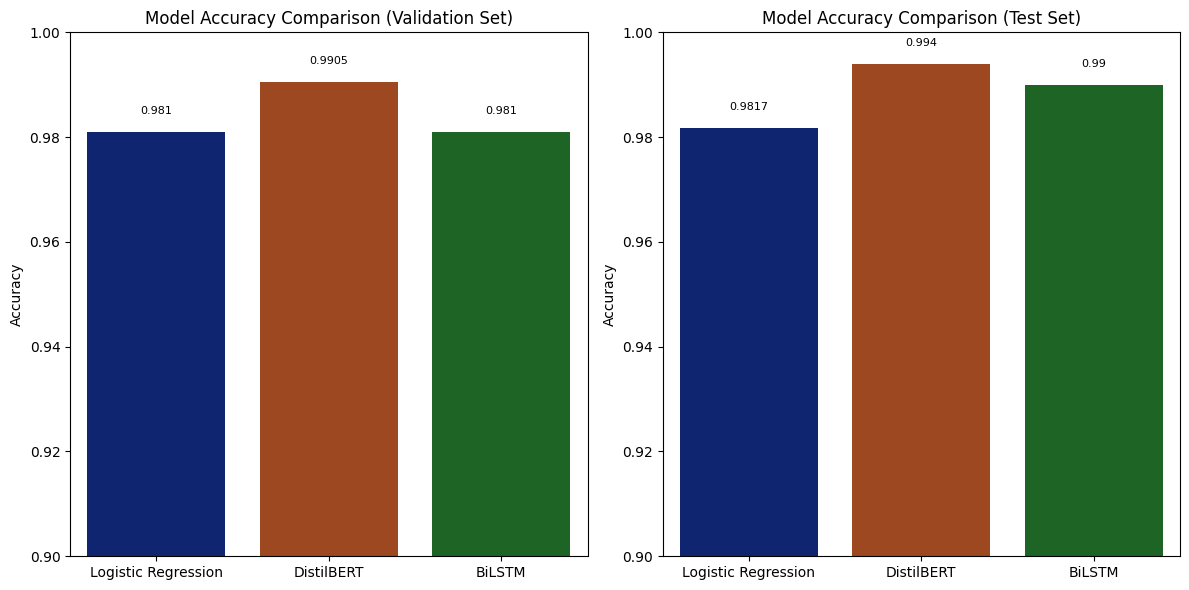

In [50]:
# Plot Accuracy
create_bar_plot(accuracy_values, 'Model Accuracy Comparison', 'Accuracy')

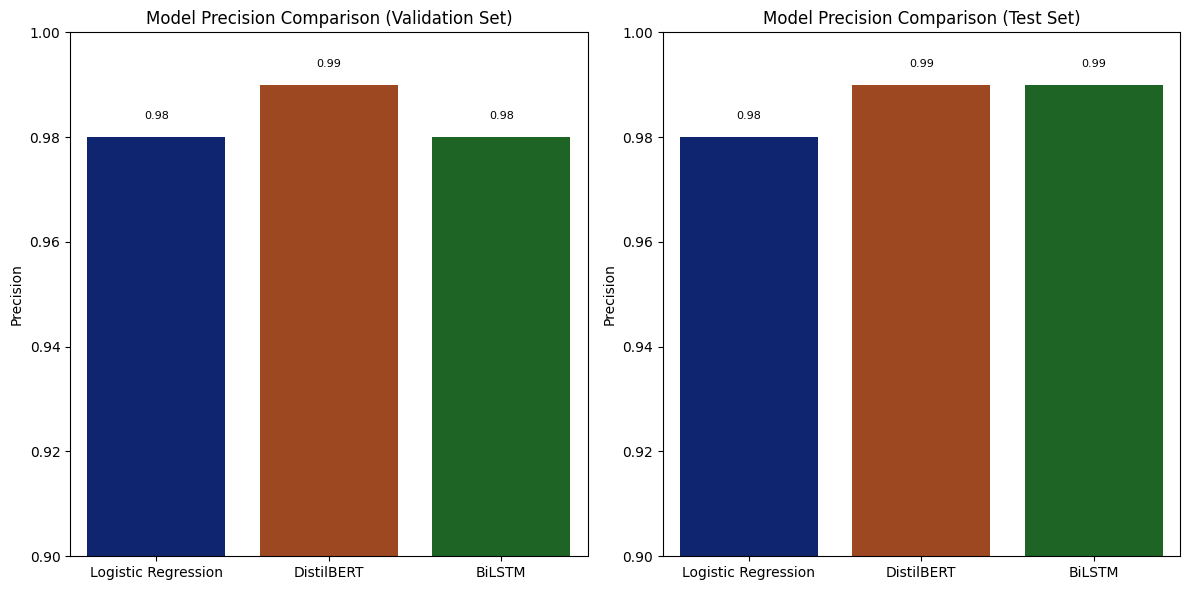

In [51]:
# Plot Precision
create_bar_plot(precision_values, 'Model Precision Comparison', 'Precision')

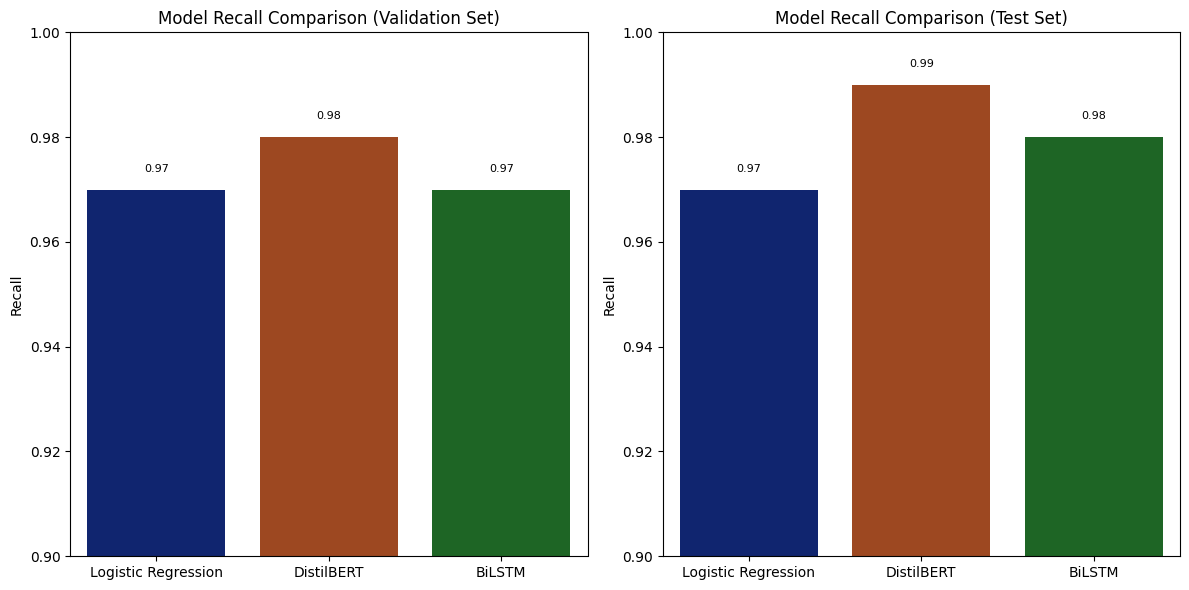

In [52]:
# Plot Recall
create_bar_plot(recall_values, 'Model Recall Comparison', 'Recall')

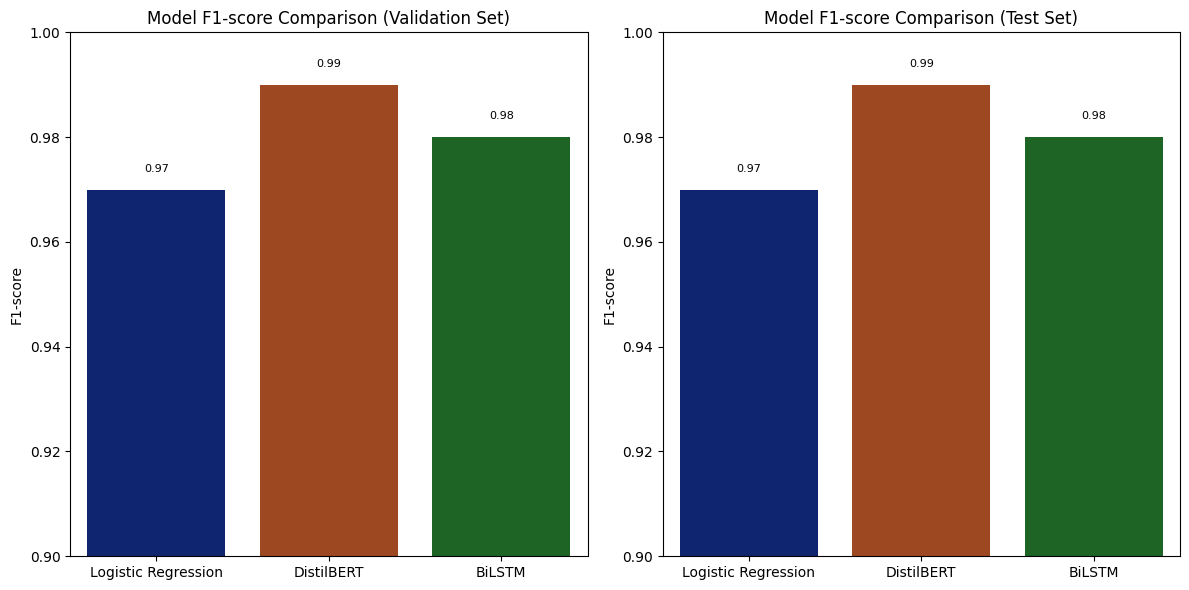

In [53]:
# Plot F1-score
create_bar_plot(f1_score_values, 'Model F1-score Comparison', 'F1-score')

In [54]:
# Calculating average performance for each model
def calculate_averages(accuracy, precision, recall, f1_score):
    averages = {}
    for dataset in datasets:
        averages[dataset] = [
            np.mean([accuracy[dataset][0], precision[dataset][0], recall[dataset][0], f1_score[dataset][0]]),
            np.mean([accuracy[dataset][1], precision[dataset][1], recall[dataset][1], f1_score[dataset][1]]),
            np.mean([accuracy[dataset][2], precision[dataset][2], recall[dataset][2], f1_score[dataset][2]])
        ]
    return averages

In [55]:
# Calculate the averages
average_performance = calculate_averages(accuracy_values, precision_values, recall_values, f1_score_values)

# Prepare data for combined bar plot
combined_data = {
    'Model': models * 2,
    'Dataset': ['Validation'] * 3 + ['Test'] * 3,
    'Average Metric': average_performance['Validation'] + average_performance['Test']
}

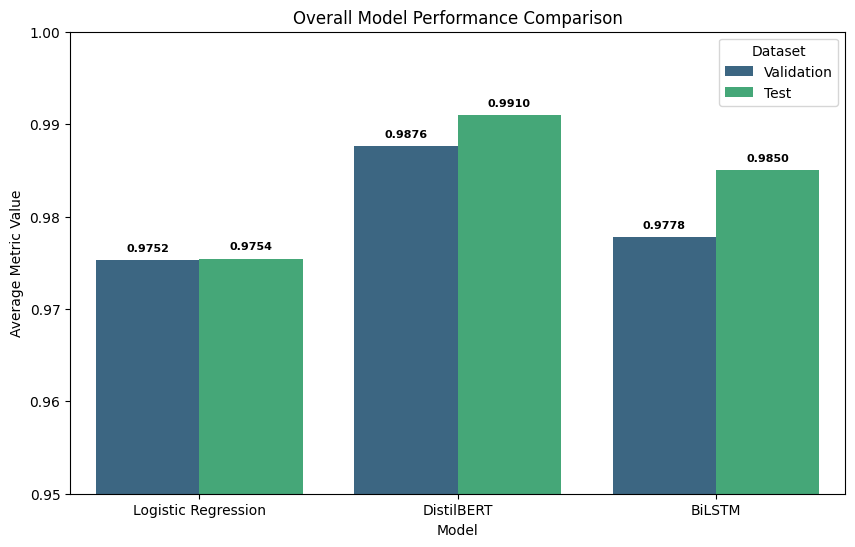

In [60]:
# Create combined bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Average Metric', hue='Dataset', data=combined_data, palette='viridis')

# Annotate the bars with exact values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}',  # format the annotation to four decimal places
                (p.get_x() + p.get_width() / 2., height),  # center of the bar
                ha='center', va='bottom', fontsize=8, color='black', weight='bold', rotation=0, xytext=(0, 5),
                textcoords='offset points')

plt.title('Overall Model Performance Comparison')
plt.ylabel('Average Metric Value')
plt.ylim(0.95, 1.0)
plt.legend(title='Dataset')
plt.show()

## **Result**

The resulting plot shows the overall average performance of Logistic Regression, DistilBERT, and BiLSTM models, allowing you to see at a glance which model performs the best across all metrics and datasets.

This plot produces the visualization that gives a clear overall comparison, showing **DistilBERT** as the best-performing model based on the combined metrics.